# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

### What are the predictors and dependent variable ?

The predictors are GRE, GPA, and prestige. 
The dependent variable is admit. 

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

The more prestigious an individual's undergraduate university was, the higher likelihood he or she will be admitted to graduate school.

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [14]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna()
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


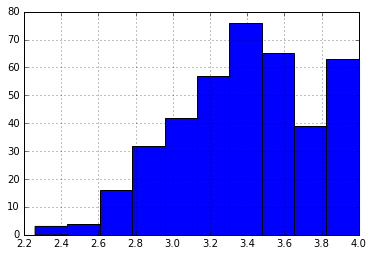

In [15]:
df['gpa'].hist()

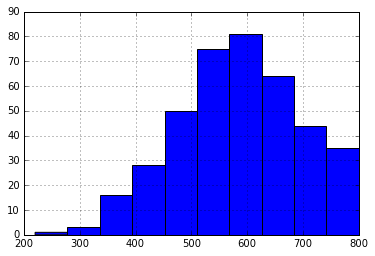

In [16]:
df['gre'].hist()

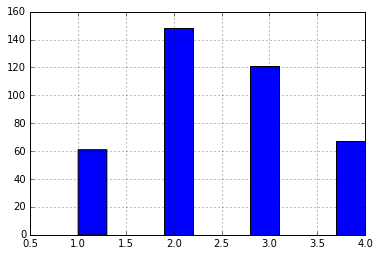

In [17]:
df['prestige'].hist()

### FInd the correlation of each feature with admission

In [18]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### How do you deal with the prestige feature?

You can create a dummy variable! 

In [22]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [21]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks)
handCalc.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,0.0,1.0


In [25]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':'prestige_4'])
print data.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0
0      0  380.0  3.61           0.0           0.0           1.0
1      1  660.0  3.67           0.0           0.0           1.0
2      1  800.0  4.00           1.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0
4      0  520.0  2.93           0.0           0.0           0.0


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [33]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression

In [34]:
lm = LogisticRegression()


In [36]:
feature_set = data[['gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, data.admit)
gs.grid_scores_
#print gs.best_estimator_

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils

[mean: 0.67375, std: 0.09156, params: {'C': 100000, 'class_weight': None},
 mean: 0.67336, std: 0.09028, params: {'C': 100000, 'class_weight': 'auto'},
 mean: 0.67257, std: 0.09184, params: {'C': 10000, 'class_weight': None},
 mean: 0.67336, std: 0.09028, params: {'C': 10000, 'class_weight': 'auto'},
 mean: 0.67320, std: 0.09152, params: {'C': 1000, 'class_weight': None},
 mean: 0.67365, std: 0.08971, params: {'C': 1000, 'class_weight': 'auto'},
 mean: 0.67224, std: 0.09114, params: {'C': 100, 'class_weight': None},
 mean: 0.67397, std: 0.09034, params: {'C': 100, 'class_weight': 'auto'},
 mean: 0.67346, std: 0.09107, params: {'C': 10, 'class_weight': None},
 mean: 0.67425, std: 0.09165, params: {'C': 10, 'class_weight': 'auto'},
 mean: 0.65792, std: 0.10631, params: {'C': 1, 'class_weight': None},
 mean: 0.66637, std: 0.10367, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.61262, std: 0.11078, params: {'C': 0.1, 'class_weight': None},
 mean: 0.63842, std: 0.11125, params: {'C': 0.

In [37]:
print gs.best_estimator_

LogisticRegression(C=10, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### What is the most important feature that contributes to the students probability of admission? 

In [42]:
feature_set = data[['gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0']]

In [46]:
lm.fit(data[['gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0']], df['admit'])
print lm.coef_
print lm.intercept_
print data.admit.mean()

[[  1.58889206e-03   1.84630743e-04   1.16761197e+00   5.26947989e-01
   -3.80822678e-02]]
[-2.07018745]
0.317380352645


In [47]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print df.admit.mean()

[[ 1.00159016  1.00018465  3.2143076   1.69375505  0.96263374]]
[ 0.12616213]
0.317380352645


As the prestige goes from 1 to 3, you can see the odds of getting admitted into graduate school decreases.

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model